In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import keras
from keras.models import Sequential 
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import * 
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

from keras.preprocessing import image


# Path for train, valid, test
TRAIN = 'sample-dog-cat/train'
VALID = 'sample-dog-cat/valid'
TEST  = 'sample-dog-cat/test'


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
train_batch = ImageDataGenerator().flow_from_directory(TRAIN, target_size=(224,224), classes=['dogs', 'cats'], batch_size=10)
valid_batch = ImageDataGenerator().flow_from_directory(VALID, target_size=(224,224), classes=['dogs', 'cats'], batch_size=4)
test_batch = ImageDataGenerator().flow_from_directory(TEST, target_size=(224,224), classes=['dogs', 'cats'], batch_size=10)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [4]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [5]:
imgs, labels = next(train_batch)

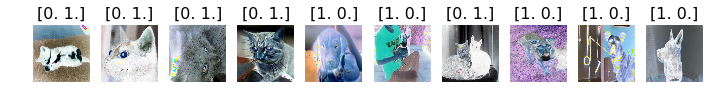

In [6]:
plots(imgs, titles=labels)

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    BatchNormalization(axis=1),
    Flatten(),
    Dense(2, activation='softmax'),
])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 222, 222, 32)      888       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 3154178   
Total params: 3,155,962
Trainable params: 3,155,518
Non-trainable params: 444
_________________________________________________________________


In [10]:
model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit_generator(train_batch, steps_per_epoch=2, validation_data=valid_batch, validation_steps=4, epochs=2, verbose=2)

Epoch 1/3
 - 38s - loss: 7.0268 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/3
 - 31s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/3
 - 23s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


In [27]:
tst_imgs, tst_labels = next(test_batch)

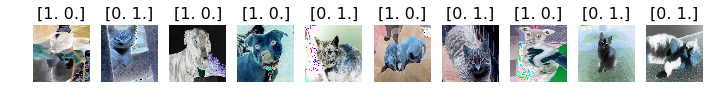

In [28]:
plots(tst_imgs, titles=tst_labels)

In [29]:
tst_labels = tst_labels[:,0]
tst_labels

array([1., 0., 1., 1., 0., 1., 0., 1., 0., 0.], dtype=float32)

In [30]:
predictions = model.predict_generator(test_batch, steps=1, verbose=1)

1/1 [==============================] - 9s 9s/step


In [31]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [32]:
cm = confusion_matrix(tst_labels, predictions[:,0])

In [33]:
cm_plot_labels = ['dogs', 'cats']

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 5]
 [0 5]]


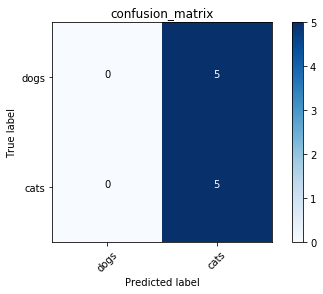

In [35]:
plot_confusion_matrix(cm, cm_plot_labels, title='confusion_matrix')